# Visualizations

## Config

In [1]:
%config InlineBackend.figure_format = 'svg'

## Imports

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.axes import Axes
from matplotlib.figure import Figure

import seaborn as sns
import seaborn.objects as so

## Aesthetics

In [3]:
sns.set_theme(
    style='whitegrid'
)

## Load data

In [4]:
folder_path_prefix = '/Users/mattia/Desktop/Lab avanzato 1 - RAG/Results'

In [5]:
folder_name = '20241005-131533-UTC'
file_name = 'metrics' + '.csv'
input_file_path = os.path.join(folder_path_prefix, folder_name, file_name)
df_1 = pd.read_csv(input_file_path)

In [6]:
folder_name = '20241008-123548-UTC'
file_name = 'metrics' + '.csv'
input_file_path = os.path.join(folder_path_prefix, folder_name, file_name)
df_2 = pd.read_csv(input_file_path)

In [7]:
folder_name = '20241009-031749-UTC'
file_name = 'metrics' + '.csv'
input_file_path = os.path.join(folder_path_prefix, folder_name, file_name)
df_3 = pd.read_csv(input_file_path)

In [8]:
folder_name = '20241009-135653-UTC'
file_name = 'metrics' + '.csv'
input_file_path = os.path.join(folder_path_prefix, folder_name, file_name)
df_4 = pd.read_csv(input_file_path)

In [9]:
df_1['LLM'] = 'Llama3.1 8b fp16 (old prompts)'
df_2['LLM'] = 'Mistral NeMo 12b fp16 (old prompts)'
df_3['LLM'] = 'Mistral NeMo 12b fp16 (new prompts)'
df_4['LLM'] = 'Llama3.1 8b fp16 (new prompts)'
df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

## Common

In [10]:
main_title = lambda class_levels: f"Results with {class_levels} classification levels. (one single vector store VS with all evidence)"

In [12]:
x_var = 'TRUNCATED_RANKING_RETRIEVER_RESULTS'
x_label = "Truncated Ranking (on VS results)"

In [13]:
figures = []

## Utilities

In [14]:
def plot_mode_comparison(df:pd.DataFrame, classification_levels: int, y_var: str, y_label: str = None, hue: str = None):
    # Create FacetGrid
    g = sns.FacetGrid(df, col='Mode', hue=hue, col_wrap=3, height=3.5, aspect=1.2)
    
    # Plot values
    g.map_dataframe(sns.lineplot, x=x_var, y=y_var, errorbar=None, marker='o')
    
    # Set main title
    g.figure.suptitle(main_title(classification_levels), x=0.35, y=1.1, fontweight='bold')
    
    # Set FacetGrid attributes
    g.set_axis_labels(x_label, y_label)
    g.add_legend(title='LLM', loc='lower left', bbox_to_anchor=(0.03, -0.25), ncols=2, frameon=True)
    
    # Set attributes on all Axes
    g.set(xticks=range(1, 11))
    
    # Add to figures collection
    figures.append(g.figure)

## Visualize data

### Preprocessing

In [15]:
def infer_mode(row: pd.Series) -> str:
    match row['FILL_EVIDENCE'], row['INVERT_EVIDENCE']:
        case True, False:
            return 'Fill'
        case False, True:
            return 'Invert'
        case False, False:
            return 'Normal'

# Add 'Mode' column
df['Mode'] = df.apply(infer_mode, axis=1)

### 2 classification levels

#### Filter data

In [16]:
df_2cl = df[df.CLASSIFICATION_LEVELS == 2]

#### Accuracy

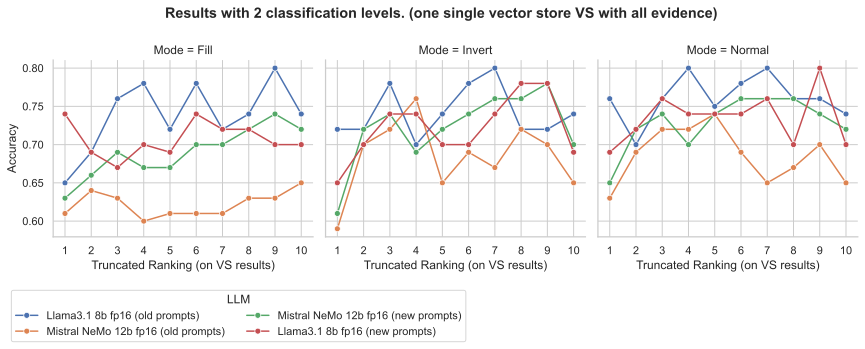

In [17]:
plot_mode_comparison(df_2cl, classification_levels=2, y_var='accuracy', y_label='Accuracy', hue='LLM')

#### Precision

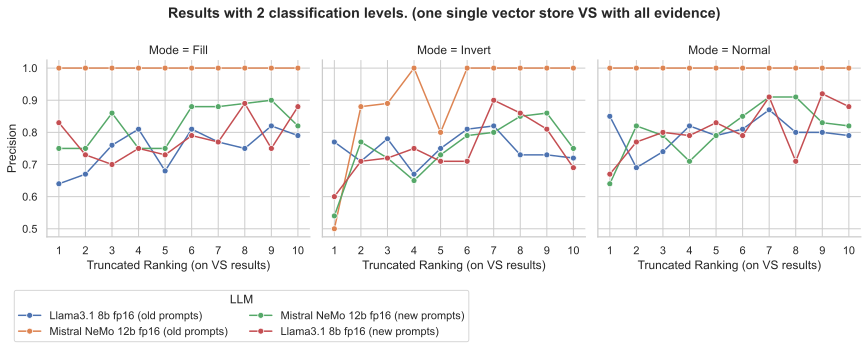

In [18]:
plot_mode_comparison(df_2cl, classification_levels=2, y_var='precision', y_label='Precision', hue='LLM')

#### Recall

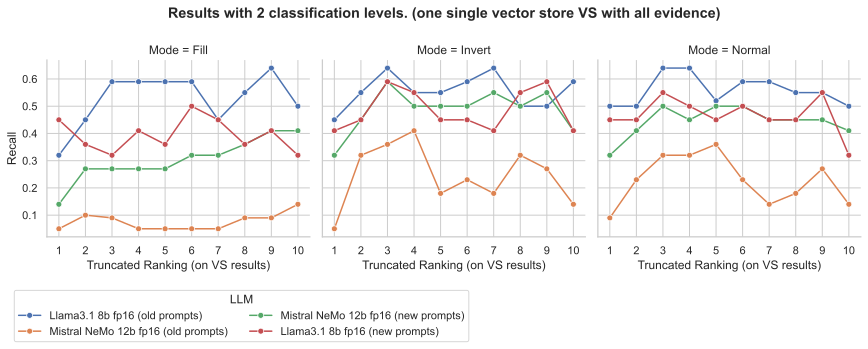

In [19]:
plot_mode_comparison(df_2cl, classification_levels=2, y_var='recall', y_label='Recall', hue='LLM')

#### F1

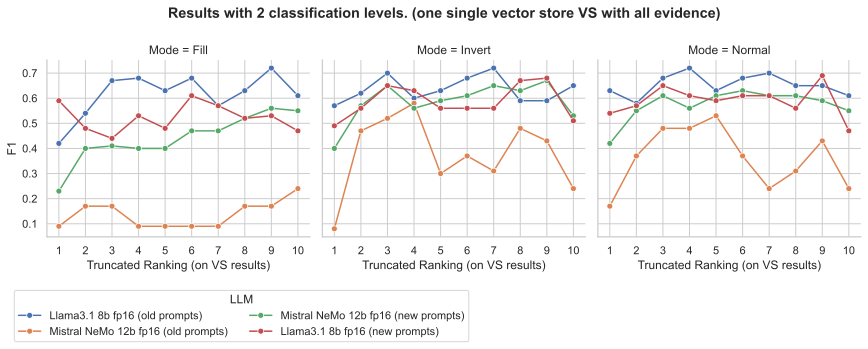

In [20]:
plot_mode_comparison(df_2cl, classification_levels=2, y_var='f1', y_label='F1', hue='LLM')

### 6 classification levels

#### Filter data

In [21]:
df_6cl = df[df.CLASSIFICATION_LEVELS == 6]

#### Accuracy

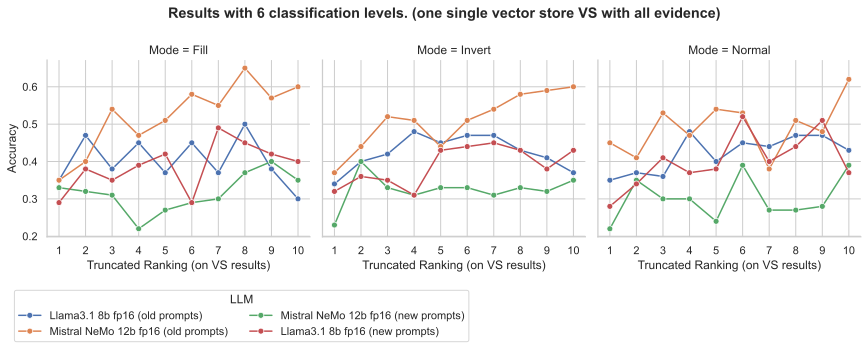

In [22]:
plot_mode_comparison(df_6cl, classification_levels=6, y_var='accuracy', y_label='Accuracy', hue='LLM')

#### MSE

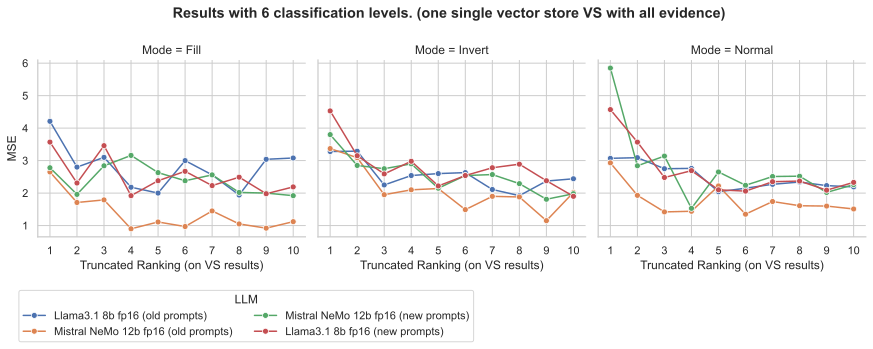

In [23]:
plot_mode_comparison(df_6cl, classification_levels=6, y_var='mse', y_label='MSE', hue='LLM')

#### MAE

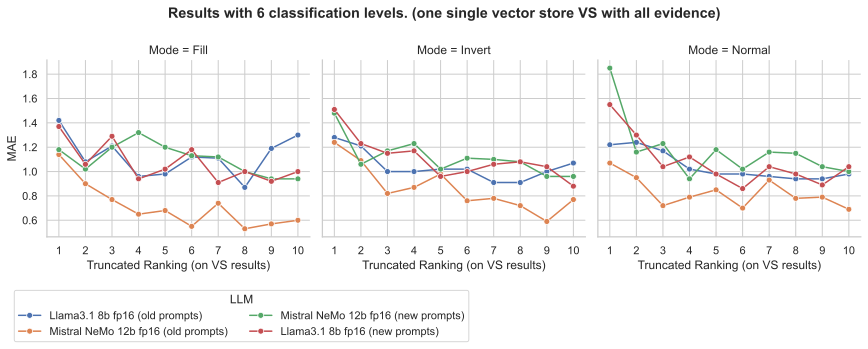

In [24]:
plot_mode_comparison(df_6cl, classification_levels=6, y_var='mae', y_label='MAE', hue='LLM')

## Save data

In [25]:
# Save all collected figures
if False:
    for index, fig in enumerate(figures):   
        output_file_path = os.path.join(folder_path_prefix, folder_name, f'chart_{index}.png')
        fig.savefig(output_file_path, dpi=300, bbox_inches = "tight")